In [1]:
import fasttext as ft
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
sns.set_theme()

In [2]:
model = ft.load_model("./model/model.bin")

In [3]:
df = pd.read_csv('./data_training/df.csv')
df.dropna(subset=['txt'], inplace=True)
df.head()

,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites,keyword,txt
0,1525185062156873730,rt @vladi_villegasp: vamos a presenciar el in...,0,194,2022-05-13 18:43:50+00:00,Twitter Web App,NaN,NaN,194,0,ciclo ruta,vamos a presenciar el inicio de un nuevo ciclo...
1,1525184470680162309,rt @grupo_energie: continuando con nuestro cic...,0,4,2022-05-13 18:41:29+00:00,Twitter for iPhone,NaN,NaN,4,0,ciclo ruta,ntinuando n nuestro ciclo de mesas del proyect...
2,1525904020979830792,@fotomultasocial @transitobucara puros alemane...,0,0,2022-05-15 18:20:43+00:00,Twitter for Android,1.525903e+18,FotoMultaSocial,0,0,ciclo ruta,puros alemanes en la ciclorruta
3,1525897380993835008,rt @vladi_villegasp: vamos a presenciar el in...,0,195,2022-05-15 17:54:20+00:00,Twitter for Android,NaN,NaN,195,0,ciclo ruta,vamos a presenciar el inicio de un nuevo ciclo...
4,1525888136483676162,rt @vladi_villegasp: vamos a presenciar el in...,0,195,2022-05-15 17:17:36+00:00,Twitter for Android,NaN,NaN,195,0,ciclo ruta,vamos a presenciar el inicio de un nuevo ciclo...


In [4]:
wvs = np.array([model.get_sentence_vector(txt) for txt in list(df.txt)])

In [5]:
tsne = TSNE(n_components=2, random_state=200, n_iter=5000, perplexity=2, learning_rate='auto',init='pca')
P = tsne.fit_transform(wvs)
labels = list(df.index)

C:\Users\Usuario1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [6]:
X = []
Y = []
for co in P:
    x, y = co
    X.append(x)
    Y.append(y)
df['x'] = X
df['y'] = Y

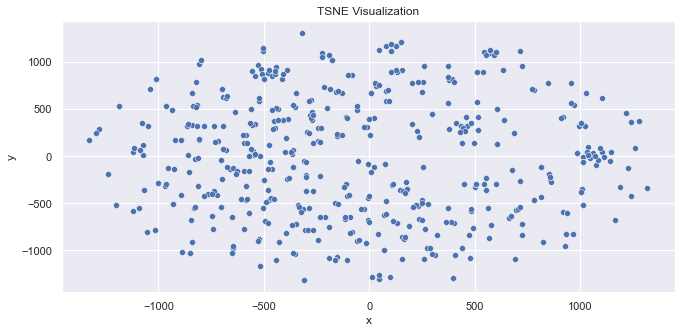

In [7]:
fig, ax = plt.subplots(figsize=(11, 5))
sns.scatterplot(x="x", y="y", data=df)
plt.title('TSNE Visualization')
plt.show()

In [8]:
x, y = P[0]

In [9]:
X = []
Y = []
for co in P:
    x, y = co
    X.append(x)
    Y.append(y)
df['x'] = X
df['y'] = Y

In [10]:
# create initial K-means model
kmeans_model = KMeans(init='k-means++', 
                      max_iter=500, 
                      random_state=42)

In [11]:
def make_list_of_K(K, dataframe):
    '''inputs: K as integer and dataframe
    apply k-means clustering to dataframe
    and make a list of inertia values against 1 to K (inclusive)
    return the inertia values list
    '''
    
    cluster_values = list(range(1, K+1))
    inertia_values=[]
    
    for c in cluster_values:
        model = KMeans(
            n_clusters = c, 
            init='k-means++', 
            max_iter=500, 
            random_state=42)
        model.fit(dataframe)
        inertia_values.append(model.inertia_)
    
    return inertia_values

In [12]:
results = make_list_of_K(20, df[['x', 'y']])

k_values_distances = pd.DataFrame({"clusters": list(range(1, 21)),
                                   "within cluster sum of squared distances": results})

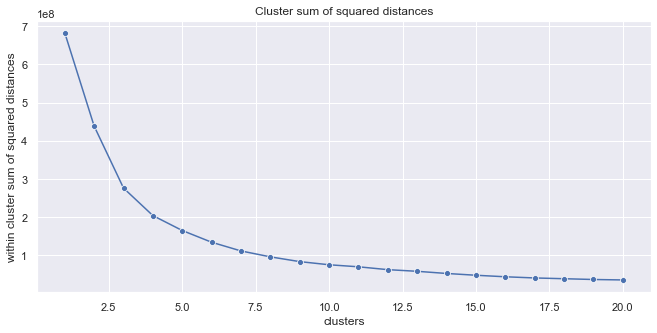

In [13]:
fig, ax = plt.subplots(figsize=(11, 5))
sns.lineplot(x="clusters", y="within cluster sum of squared distances", data=k_values_distances, marker='o')
plt.title('Cluster sum of squared distances')
plt.show()

In [14]:
# create clustering model with optimal k=4
updated_kmeans_model = KMeans(n_clusters = 5, 
                              init='k-means++', 
                              max_iter=500, 
                              random_state=42)

df['cluster'] = updated_kmeans_model.fit_predict(df[['x', 'y']])

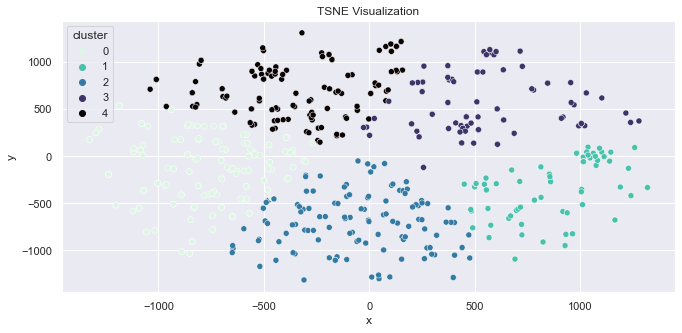

In [15]:
fig, ax = plt.subplots(figsize=(11, 5))
sns.scatterplot(data=df, x="x", y="y", hue="cluster", palette='mako_r')
plt.title('TSNE Visualization')
plt.show()

# Modelo Pre-Entrados

In [16]:
model = ft.load_model('cc.es.300.bin')

In [17]:
wvs = np.array([model.get_sentence_vector(txt) for txt in list(df.txt)])

In [18]:
tsne = TSNE(n_components=2, random_state=200, n_iter=5000, perplexity=2, learning_rate='auto',init='pca')
P = tsne.fit_transform(wvs)
labels = list(df.index)

C:\Users\Usuario1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [19]:
X = []
Y = []
for co in P:
    x, y = co
    X.append(x)
    Y.append(y)
df['x'] = X
df['y'] = Y

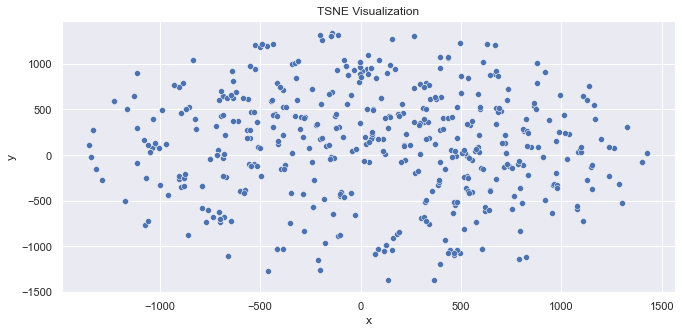

In [20]:
fig, ax = plt.subplots(figsize=(11, 5))
sns.scatterplot(x="x", y="y", data=df)
plt.title('TSNE Visualization')
plt.show()

In [21]:
results = make_list_of_K(20, df[['x', 'y']])

k_values_distances = pd.DataFrame({"clusters": list(range(1, 21)),
                                   "within cluster sum of squared distances": results})

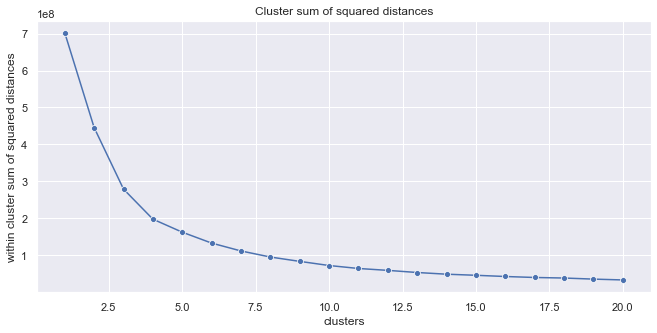

In [22]:
fig, ax = plt.subplots(figsize=(11, 5))
sns.lineplot(x="clusters", y="within cluster sum of squared distances", data=k_values_distances, marker='o')
plt.title('Cluster sum of squared distances')
plt.show()

In [23]:
# create clustering model with optimal k=4
updated_kmeans_model = KMeans(n_clusters = 5, 
                              init='k-means++', 
                              max_iter=500, 
                              random_state=42)

df['cluster'] = updated_kmeans_model.fit_predict(df[['x', 'y']])

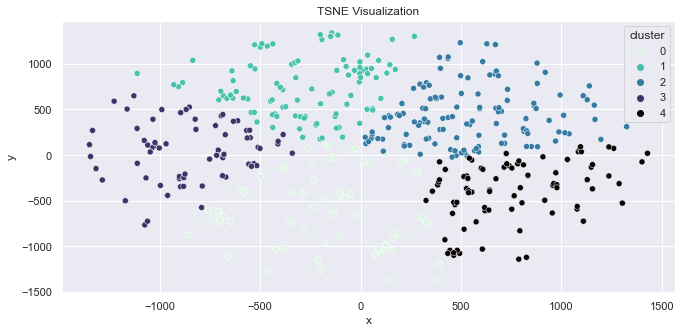

In [24]:
fig, ax = plt.subplots(figsize=(11, 5))
sns.scatterplot(data=df, x="x", y="y", hue="cluster", palette='mako_r')
plt.title('TSNE Visualization')
plt.show()

# WordClouds

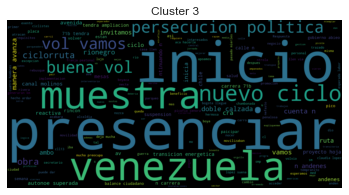

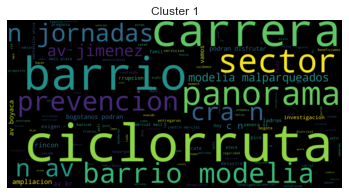

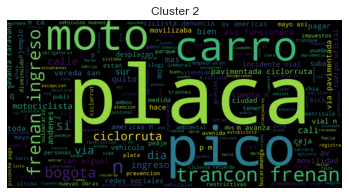

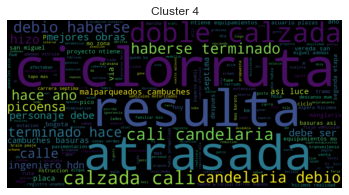

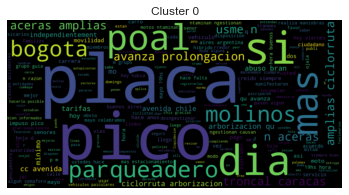

In [16]:
for c in df['cluster'].unique():
    dc = df[df['cluster'] == c]
    full_text = " ".join(dc["txt"])
    wordcloud = WordCloud(stopwords=stopwords.words("spanish"), width=1600, height=800).generate(full_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Cluster ' + str(c))
    plt.show()

In [17]:
df.to_csv('final.csv', index=False)